In [ ]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2i_yx_zq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2i_yx_zq
  Resolved https://github.com/facebookresearch/detectron2.git to commit e9f7e2ba15abd7badcb05ef6f5076f06b36a9c5b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50

In [ ]:
!pip install labelme
!pip install labelme2coco
!pip install rarfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.3 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.3.1-py3-none-any.whl size=1472256 sha256=fb09b8ecbb59366e8f7d437b68ac035eaf77144ba8f7dc6bf59984c70c862c09
  Stored in directory: /root/.cache/pip/wheels/32/d6/4d/f22a84b8a82543c9db037748207ca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from rarfile import RarFile
import os

In [ ]:
# Specify the path to the RAR file
rar_file_path = '/content/drive/MyDrive/face_project.rar'

# Specify the extraction path
extracted_path = '/content/'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the RAR file
with RarFile(rar_file_path, 'r') as rar:
    rar.extractall(extracted_path)

# List the contents of the extraction directory
extracted_contents = os.listdir(extracted_path)
extracted_contents

['.config',
 'train_images',
 'train.json',
 'valid_images',
 'test.json',
 'drive',
 'test_images',
 'valid.json',
 'sample_data']

In [ ]:
import torch
import detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

In [ ]:
# Set GPU memory limit
torch.cuda.set_per_process_memory_fraction(0.5)

In [ ]:
classes = ['Mask', 'No Mask']

In [ ]:
# Train dataset
register_coco_instances("train_dataset", {}, "/content/train.json", "/content/train_images")
MetadataCatalog.get("train_dataset").set(thing_classes=classes)
train_metadata = MetadataCatalog.get('train_dataset')

In [ ]:
# Test dataset
register_coco_instances("test_dataset", {}, "/content/test.json", "/content/test_images")
MetadataCatalog.get("test_dataset").set(thing_classes=classes)
test_metadata = MetadataCatalog.get('test_dataset')

In [ ]:
# Validation dataset
register_coco_instances("valid_dataset", {}, "/content/valid.json", "/content/valid_images")
MetadataCatalog.get("valid_dataset").set(thing_classes=classes)
valid_metadata = MetadataCatalog.get('valid_dataset')

WARNING [12/29 15:44:26 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/29 15:44:26 d2.data.datasets.coco]: Loaded 317 images in COCO format from /content/train.json


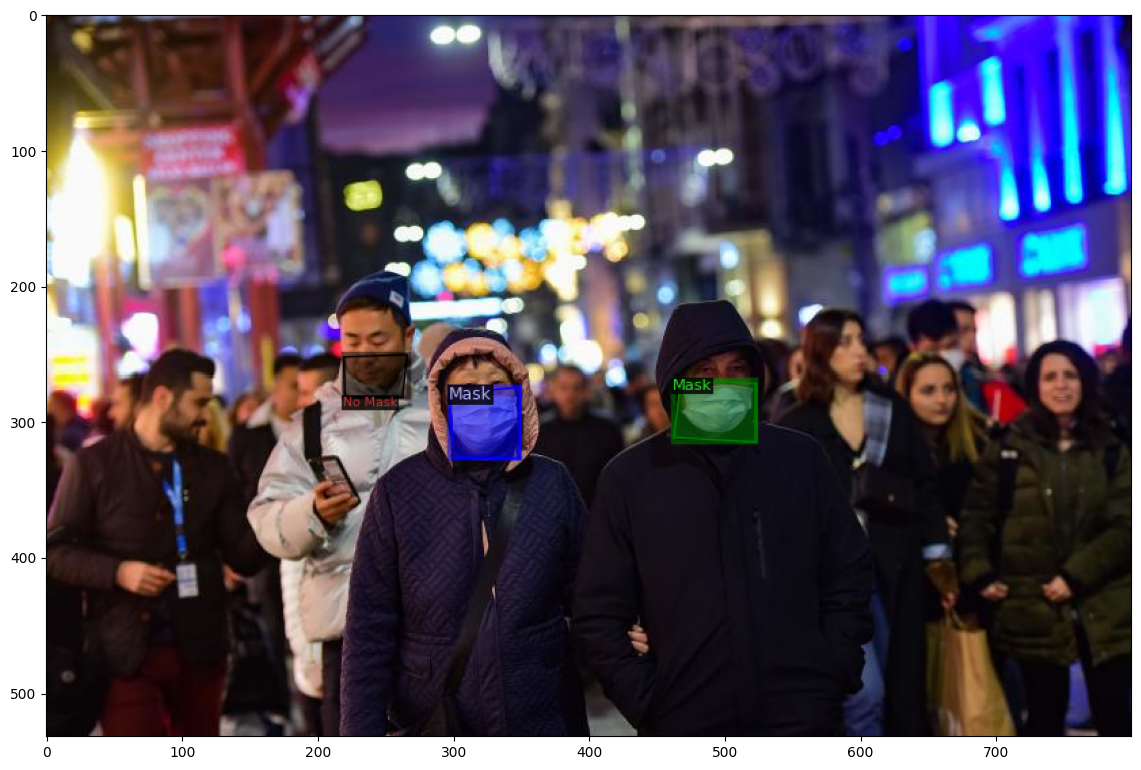

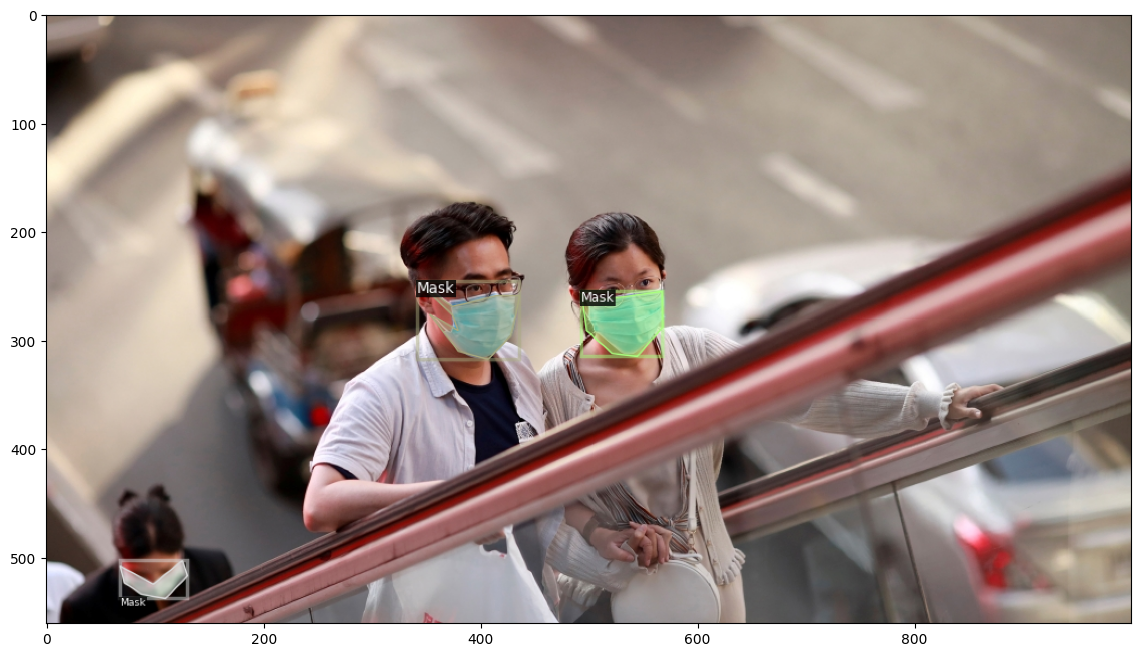

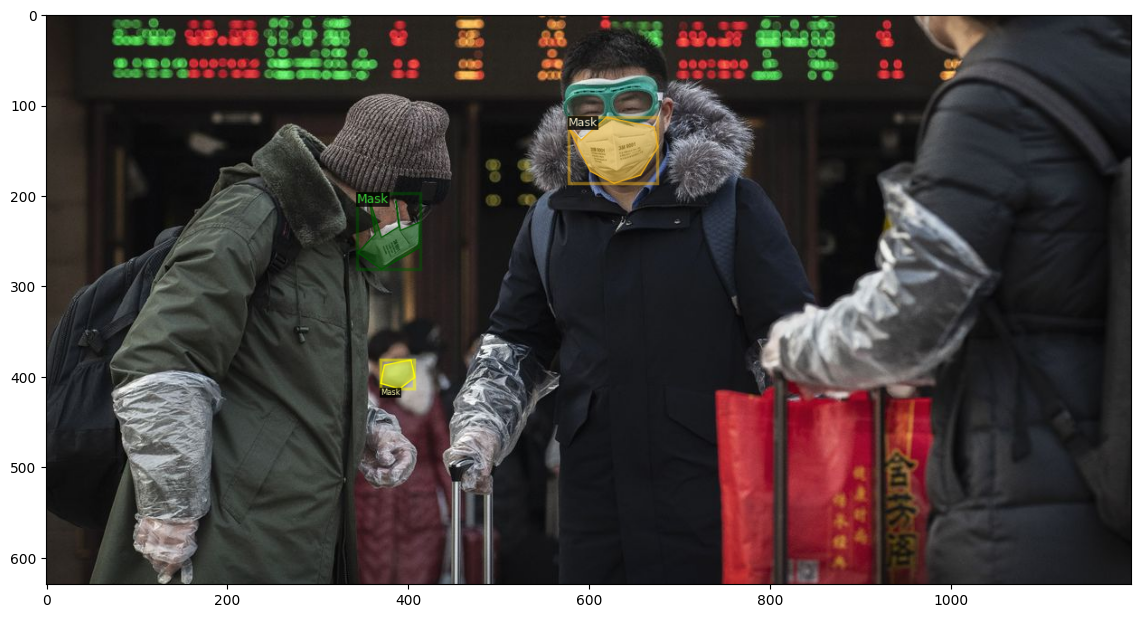

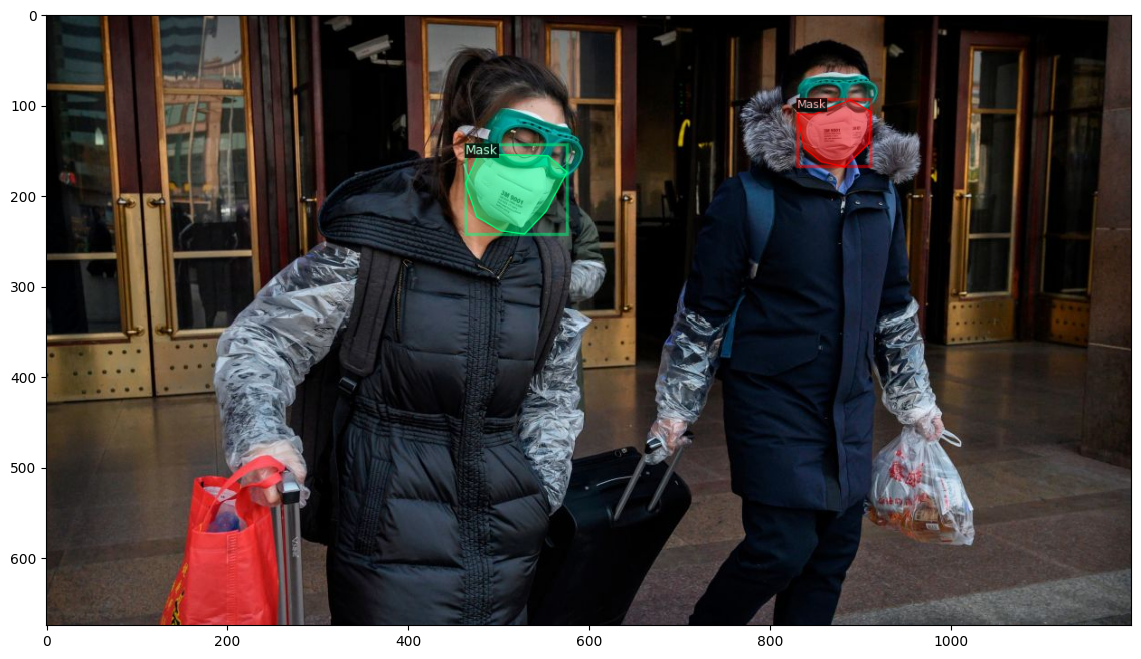

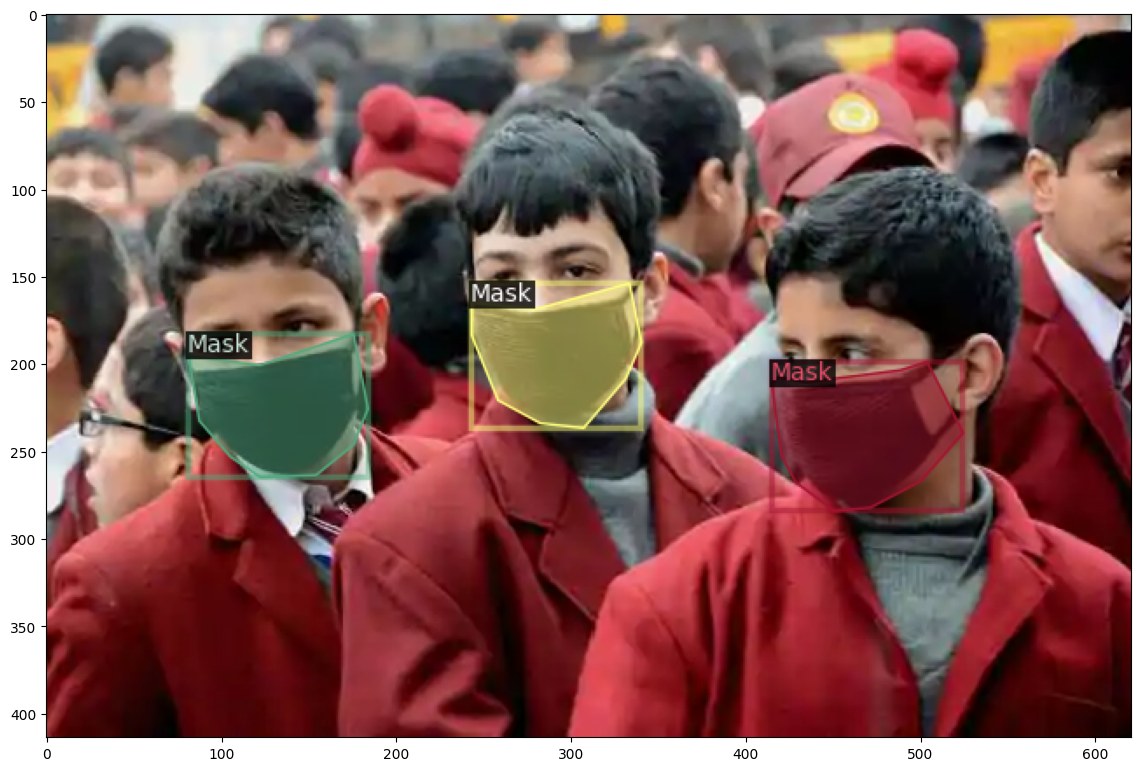

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get('train_dataset')
for d in random.sample(dataset_dicts, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(vis.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# from detectron2.engine import DefaultTrainer
# from detectron2.config import get_cfg

# cfg = get_cfg()
# # cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
# #cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
# #cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))

# cfg.DATASETS.TRAIN = ('train_dataset',)
# cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
# cfg.DATALOADER.NUM_WORKERS = 2
# # cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
# #cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")
# #cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)

# # cfg.SOLVER.IMS_PER_BATCH = 4
# # cfg.SOLVER.BASE_LR = 0.001
# # cfg.SOLVER.WARMUP_ITERS = 1000
# # cfg.SOLVER.MAX_ITER = 1000
# cfg.SOLVER.STEPS = [] # do not decay learning rate
# #cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 **
# # cfg.SOLVER.GAMMA = 0.05

# # cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
# # cfg.DATASETS.TRAIN = ("train_dataset",)
# # cfg.DATASETS.TEST = ("test_dataset",)

# cfg.SOLVER.MAX_ITER = 1000
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust this value based on available GPU memory

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("test_dataset",)

In [ ]:
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust this value based on available GPU memory

In [ ]:
torch.cuda.empty_cache()

#TRAINING

In [ ]:
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/29 15:44:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_a54504.pkl: 178MB [00:00, 192MB/s]                           


[12/29 15:44:34 d2.engine.train_loop]: Starting training from iteration 0
[12/29 15:44:49 d2.utils.events]:  eta: 0:09:10  iter: 19  total_loss: 1.503  loss_cls: 0.4875  loss_box_reg: 0.0798  loss_mask: 0.8373  loss_rpn_cls: 0.09512  loss_rpn_loc: 0.02211    time: 0.6271  last_time: 0.5489  data_time: 0.0370  last_data_time: 0.0167   lr: 1.9981e-05  max_mem: 2758M
[12/29 15:45:10 d2.utils.events]:  eta: 0:09:31  iter: 39  total_loss: 1.438  loss_cls: 0.4098  loss_box_reg: 0.1207  loss_mask: 0.6747  loss_rpn_cls: 0.06844  loss_rpn_loc: 0.02313    time: 0.6969  last_time: 0.5247  data_time: 0.0603  last_data_time: 0.0044   lr: 3.9961e-05  max_mem: 2793M
[12/29 15:45:20 d2.utils.events]:  eta: 0:08:36  iter: 59  total_loss: 1.135  loss_cls: 0.4191  loss_box_reg: 0.08434  loss_mask: 0.5008  loss_rpn_cls: 0.1028  loss_rpn_loc: 0.02745    time: 0.6360  last_time: 0.5273  data_time: 0.0143  last_data_time: 0.0132   lr: 5.9941e-05  max_mem: 2793M
[12/29 15:45:30 d2.utils.events]:  eta: 0:08:09

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ("test_dataset", )
predictor = DefaultPredictor(cfg)

from detectron2.utils.visualizer import ColorMode
import glob
from google.colab.patches import cv2_imshow

# Provide a specific file pattern (e.g., '*.jpg') to match only image files
for imageName in glob.glob('/content/test_images/*.jpg'):
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=train_metadata,
                   scale=0.8
                  )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
from google.colab import files

files.download('/content/output/model_final.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("test_dataset", cfg, False, output_dir="/content/output/")
val_loader = build_detection_test_loader(cfg, "test_dataset")
inference_on_dataset(trainer.model, val_loader, evaluator)

#print(results)

In [ ]:
import torch
from PIL import Image
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.structures import Instances
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# Load the model configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust this value based on available GPU memory
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
#cfg.DATASETS.TEST = ("test_dataset", )
#predictor = DefaultPredictor(cfg)
# Load model configuration (modify as needed)
#cfg.merge_from_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
#model.load_state_dict(torch.load("/content/drive/MyDrive/facemask_project/detectron2_maskdetectionv2.pth", map_location=torch.device("cpu")))
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/facemask_project/model_final.pth"
model = build_model(cfg)
model.eval()

image_path = "/content/drive/MyDrive/facemask_project/images293.jpg"  # Replace with the path to your input image
img = Image.open(image_path)
img_array = np.array(img)

inputs = {"image": torch.as_tensor(img_array, dtype=torch.float32).permute(2, 0, 1), "height": img_array.shape[0], "width": img_array.shape[1]}

# Perform inference
with torch.no_grad():
    predictions = model([inputs])

# Post-process the predictions
instances = predictions[0]["instances"].to("cpu")
boxes = instances.pred_boxes.tensor.numpy()
scores = instances.scores.numpy()
classes = instances.pred_classes.numpy()

# Print or use the results as needed
print("Predicted Boxes:", boxes)
print("Predicted Scores:", scores)
print("Predicted Classes:", classes)


img_array = np.array(img)


v = Visualizer(img_array[:, :, ::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=0.8)
out = v.draw_instance_predictions(predictions[0]["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])


In [ ]:
# from flask import Flask, request, jsonify
# import torch
# from PIL import Image
# from detectron2.config import get_cfg
# from detectron2.modeling import build_model
# from detectron2.structures import Instances
# from detectron2 import model_zoo
# from detectron2.engine import DefaultPredictor
# import os
# #from pyngrok import ngrok


# app = Flask(__name__)

# # Load the model
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
# cfg.DATASETS.TRAIN = ("train_dataset",)
# #cfg.DATASETS.TEST = ("test_dataset",)
# cfg.SOLVER.MAX_ITER = 1000
# cfg.SOLVER.BASE_LR = 0.001
# cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust this value based on available GPU memory
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
# #cfg.DATASETS.TEST = ("test_dataset", )
# #predictor = DefaultPredictor(cfg)
# # Load model configuration (modify as needed)
# #cfg.merge_from_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")
# model = build_model(cfg)
# model.load_state_dict(torch.load("/content/drive/MyDrive/facemask_project/detectron2_maskdetectionv2.pth", map_location=torch.device("cpu")))
# model.eval()


# @app.route('/')
# def hello():
#   return "hello"


# @app.route('/predict', methods=['POST'])
# def predict():
#     # Handle image upload
#     # file = request.files['file']
#     # img = Image.open(file.stream)

#     # # Perform inference with the model
#     # predictions = model(img)

#     # return jsonify(predictions)


#     # Handle image upload
#     file = request.files['file']
#     img = Image.open(file.stream)

#     # Preprocess the image
#     inputs = {"image": img, "height": img.size[1], "width": img.size[0]}
#     predictions = model([inputs])

#     # Post-process the predictions if needed
#     # ...

#     return jsonify(predictions)









# # def predict_with_model(image):
# #     # Preprocess image
# #     # ...

# #     # Run inference
# #     with torch.no_grad():
# #         outputs = model(images)

# #     # Post-process the predictions if needed
# #     # ...

# #     return outputs

# if __name__ == '__main__':
#     # This is not recommended for production; it's for testing purposes in Colab only
#     app.run(debug=True,port=5000)


# # if __name__ == '__main__':
# #     # Run Flask app with Ngrok
# #     app_url = ngrok.connect(port=5000)
# #     print(' * Tunnel URL:', app_url)

# #     # Run Flask app on Colab
# #     app.run(port=5000)